# Sheet 2

First, import a few commonly-used functions

In [2]:
%matplotlib inline 
import numpy as np #hahaha 
import matplotlib.pyplot as plt
import pandas as pd

# Exercise 1: Bias-variance tradeoff for k-nearest-neighbors (knn) classifier

In [3]:
iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
iris.columns = ["Sepal_length", "Sepal_width", "Petal_length", "Petal_width", "Species"]
iris.head(8)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


Divide the data set into train and test as done on exercise sheet 1.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

iris.columns = ["Sepal_length", "Sepal_width", "Petal_length", "Petal_width", "Species"]
X=iris[['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']]  # Features
y=iris['Species']  # Labels

# Normalise features

X_norm = normalize(X)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test =train_test_split(X_norm, y, test_size=0.5)# 50% training and 50% test
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(75, 4) (75,)
(75, 4) (75,)


After splitting, you will train the model on the training set.

In [15]:
#Import knn Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
##https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75
#Create a knn Classifier
acc_train = np.zeros(15)
acc_test = np.zeros(15)
for i, knn_neighbors in enumerate(np.arange(1,30,2)): #knn_neighbors really bother me a lot!
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(X_train, y_train)
    pred_i = knnmodel.predict(X_test)
    acc_train[i] = 
    acc_test[i]=accuracy_score(y_test, pred_i)
    acc_test.append(accuracy_score(y_test, pred_i))

ValueError: Expected n_neighbors > 0. Got 0

# Exercise 2: Expected prediction error

We can compute, for a grid of threshold values, the average
prediction error for each of these threshold values, as:
...

We can plot the theoretical EPE with:

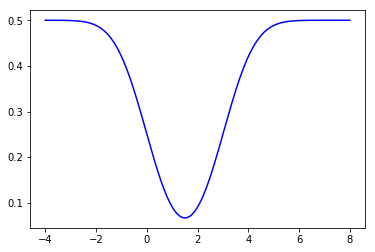

In [6]:
from scipy.stats import norm
def theoMisclas(t):
    return ...

thres = np.arange(-4, 8, 0.01)
theoEPE = theoMisclas(thres)
plt.figure()
plt.plot(thres,theoEPE,color='blue',label='Theoretical')

We can compute the optimal $\hat{t}$, as:
...

The simulation can be done as follows:

In [4]:
...


Plot the density of the empirical
marginal distribution of $X$ and the empirical conditional distributions of $X$
divided according to the two groups,i.e. $X[Y==1]$ and $X[Y==0]$.

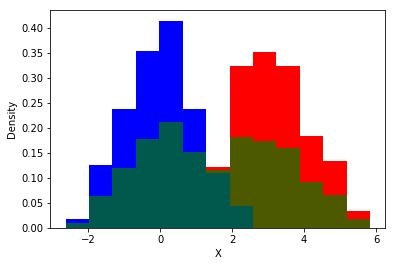

In [5]:
...

We compute the empirical error function as:

Text(0,0.5,'Misclassification rate')

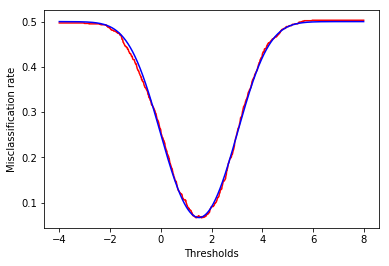

In [90]:
from scipy.stats import norm
def aveMisclas(t):
    return np.mean((X >= t) != Y)


thres = np.arange(-4, 8, 0.01)
aveMisclasFunc = np.vectorize(aveMisclas)
empEPE = aveMisclasFunc(thres)

plt.figure()
plt.plot(thres, empEPE,color='red',label='Experimental')
plt.plot(thres,theoEPE,color='blue',label='Theoretical')
plt.xlabel('Thresholds')
plt.ylabel('Misclassification rate')

## Exercise 3 (optional): Analysis of Data on Hepatitis C

In [31]:
import pandas as pd
HepCevol = pd.read_csv("HepCevol.txt",delimiter=' ')
HepCevol.head(5)

,segment,pos,nucleotide.77,nucleotide.90
1,A,42,G,A
2,A,275,C,T
3,A,348,C,T
4,A,447,A,G
5,A,556,G,A


First we write a function that, given $\alpha$ and time value, returns the matrix of
transition probabilities. The default is time = 1 to make the function work even if we don't
specify time.

In [27]:
def tpJC(alpha,time=1):
    ...
    return tp

In [78]:
M = tpJC(0.0005,1)
print(M)

[[9.98501499e-01 4.99500333e-04 4.99500333e-04 4.99500333e-04]
 [4.99500333e-04 9.98501499e-01 4.99500333e-04 4.99500333e-04]
 [4.99500333e-04 4.99500333e-04 9.98501499e-01 4.99500333e-04]
 [4.99500333e-04 4.99500333e-04 4.99500333e-04 9.98501499e-01]]


The log likelihood function is... Written it in Python, we have:


In [86]:
def mll(alpha,mutation_counts,time=1,tp = tpJC):
    return ...

To estimate $\alpha$ using MLE we need to minimize the above log likelood by taking its derivative on $\alpha$. ...

We implement the computation of the MLE for the given probabilistic model based on a tabulation of the
transitions.

In [6]:
def alphahat(mutation_counts,t):
    ...
    return alpha

Then we tabulate our data for the three segments and compute the MLEs.

Segment A, the diagonal terms are $[470, 761, 746, 555]$

In [81]:
xSegA = np.zeros((4,4))
nucleotide = ['A','C','G','T']
for i in np.arange(4):
    for j in np.arange(4):
        if j!=i:
            xSegA[i,j]= ...
np.fill_diagonal(xSegA, [470, 761, 746, 555])
print(xSegA)
alphahat_A = alphahat(xSegA,13)
print(alphahat_A)

[[470.   1.  11.   1.]
 [  4. 761.   1.  20.]
 [ 13.   3. 746.   1.]
 [  3.  19.   1. 555.]]
0.0007819685550139501


SegmentB, the diagonal terms are $[252, 389, 347, 271]$

In [69]:
xSegB = np.zeros((4,4))
nucleotide = ['A','C','G','T']
for i in np.arange(4):
    for j in np.arange(4):
        if j!=i:
            xSegB[i,j]= ...
np.fill_diagonal(xSegB, [252, 389, 347, 271])
print('xSegB:',xSegB)
alphahat_B = alphahat(xSegB,13)
print('alphahat_B:',alphahat_B)


xSegB: [[252.   0.   5.   0.]
 [  1. 389.   0.   8.]
 [  1.   1. 347.   1.]
 [  2.   6.   0. 271.]]
alphahat_B: 0.0005058358229211719


SegmentC, the diagnoal terms are $[230, 299, 282, 198]$

In [82]:
xSegC = np.zeros((4,4))
nucleotide = ['A','C','G','T']
for i in np.arange(4):
    for j in np.arange(4):
        if j!=i:
            xSegC[i,j]= ...
np.fill_diagonal(xSegC, [230, 299, 282, 198])
print('xSegC:',xSegC)
alphahat_C = alphahat(xSegC,13)
print('alphahat_C:',alphahat_C)

xSegC: [[230.   1.   2.   0.]
 [  1. 299.   2.   5.]
 [  4.   0. 282.   0.]
 [  1.   3.   1. 198.]]
alphahat_C: 0.0005049392598775057


Make a Plot

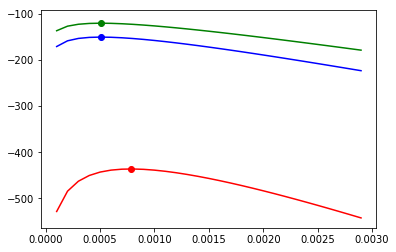

In [89]:
alphaCandi = np.arange(0.0001, 0.003, 0.0001)
mllExpA = np.zeros(alphaCandi.shape)
mllExpB = np.zeros(alphaCandi.shape)
mllExpC = np.zeros(alphaCandi.shape)
for i in range(alphaCandi.shape[0]):
    mllExpA[i]=mll(alphaCandi[i],xSegA,time=13)
    mllExpB[i]=mll(alphaCandi[i],xSegB,time=13)
    mllExpC[i]=mll(alphaCandi[i],xSegC,time=13)
plt.figure()
plt.plot(alphaCandi,mllExpA,color='red',label='segmentA')
plt.scatter(alphahat_A,mll(alphahat_A,xSegA,time=13),color='red')
plt.plot(alphaCandi,mllExpB,color='blue',label='segmentB')
plt.scatter(alphahat_B,mll(alphahat_B,xSegB,time=13),color='blue')
plt.plot(alphaCandi,mllExpC,color='green',label='segmentC')
plt.scatter(alphahat_C,mll(alphahat_C,xSegC,time=13),color='green')